In [68]:
import pandas as pd
import jsonl_to_dfs
import trollcleanup
import nlprocess
import nltk
nltk.download('punkt')

from nltk import word_tokenize, FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
np.random.seed(1942)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/flatironschool/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [2]:
data = jsonl_to_dfs.get_all_df(["tweets1.jsonl","tweets2.jsonl","tweets3.jsonl"])

In [6]:
tweets=data[0]
users=data[1]

In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [139]:
nontroll=trollcleanup.clean_tweets_df(tweets,0)

Original: 411422
Drop null ids: 411422
Drop null tweets: 411422
411422
411421
Drop dup tweet ids: 411421
All languages: 411421
Just English: 379198


In [81]:
nontroll.head()

,created_str,hashtags,favorite_count,text,lang,retweet_count,retweeted,mentions,hashtags_count,mentions_count,date_time,target
763431308773040128,Wed Aug 10 17:46:22 +0000 2016,[teaparty],0,Emails show staffers approving a deal that l...,en,479,1,"[TPPatriots, HillaryClinton]",1,2,2016-08-10 17:46:22,0
763431353111027712,Wed Aug 10 17:46:33 +0000 2016,[],0,"Why are the media, politicians and big busine...",en,101,1,[ThankYouDonald],0,1,2016-08-10 17:46:33,0
763431388984975360,Wed Aug 10 17:46:41 +0000 2016,[],0,Guy behind Trump immediately realized what he...,en,8021,1,[ChrisVannini],0,1,2016-08-10 17:46:41,0
763431441535467520,Wed Aug 10 17:46:54 +0000 2016,[],0,"you should care, it shows hes in with mob, p...",en,0,0,[cull0519],0,1,2016-08-10 17:46:54,0
763431528382758912,Wed Aug 10 17:47:14 +0000 2016,[hillarykilledmyfriends],0,No way! She’s the beacon of integrity. And peo...,en,0,0,[],1,0,2016-08-10 17:47:14,0


In [140]:
troll=pd.read_csv('russian-troll-tweets/tweets.csv')
troll.head()

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id
0,1.868981e+09,ryanmaxwell_1,1.458672e+12,2016-03-22 18:31:42,NaN,NaN,NaN,#IslamKills Are you trying to say that there w...,7.123460e+17,NaN,"[""IslamKills""]",[],POSTED,[],NaN,NaN
1,2.571870e+09,detroitdailynew,1.476133e+12,2016-10-10 20:57:00,0.0,False,0.0,"Clinton: Trump should’ve apologized more, atta...",7.855849e+17,"<a href=""http://twitterfeed.com"" rel=""nofollow...",[],"[""http://detne.ws/2e172jF""]",POSTED,[],NaN,NaN
2,1.710805e+09,cookncooks,1.487767e+12,2017-02-22 12:43:43,NaN,NaN,NaN,RT @ltapoll: Who was/is the best president of ...,8.343832e+17,NaN,[],[],POSTED,[],NaN,NaN
3,2.584153e+09,queenofthewo,1.482765e+12,2016-12-26 15:06:41,NaN,NaN,NaN,RT @jww372: I don't have to guess your religio...,8.134006e+17,NaN,"[""ChristmasAftermath""]",[],POSTED,[],NaN,NaN
4,1.768260e+09,mrclydepratt,1.501987e+12,2017-08-06 02:36:24,NaN,NaN,NaN,RT @Shareblue: Pence and his lawyers decided w...,8.940243e+17,NaN,[],[],POSTED,[],NaN,NaN


In [37]:
t_users = pd.read_csv('russian-troll-tweets/users.csv')

,id,location,name,followers_count,statuses_count,time_zone,verified,lang,screen_name,description,created_at,favourites_count,friends_count,listed_count
0,18710816.0,near Utah Ave & Lighthouse an,Robby Delaware,304.0,11484.0,Pacific Time (US & Canada),False,en,RobbyDelaware,"I support the free movement of people, ideas a...",Wed Jan 07 04:38:02 +0000 2009,17.0,670.0,13.0
1,100345056.0,still ⬆️Block⤵️Corner⬇️street,#Ezekiel2517✨...,1053.0,31858.0,NaN,False,en,SCOTTGOHARD,CELEBRITY TRAINER ✨#424W147th✨ #CrossfitCoach ...,Tue Dec 29 23:15:22 +0000 2009,2774.0,1055.0,35.0
2,247165706.0,"Chicago, IL",B E C K S T E R✨,650.0,6742.0,Mountain Time (US & Canada),False,en,Beckster319,Rebecca Lynn Hirschfeld Actress.Model.Writer.A...,Fri Feb 04 06:38:45 +0000 2011,7273.0,896.0,30.0
3,249538861.0,NaN,Chris Osborne,44.0,843.0,NaN,False,en,skatewake1994,NaN,Wed Feb 09 07:38:44 +0000 2011,227.0,154.0,1.0
4,449689677.0,NaN,Рамзан Кадыров,94773.0,10877.0,Moscow,False,ru,KadirovRussia,"Пародийный аккаунт. Озвучиваю то, что политика...",Thu Dec 29 11:31:09 +0000 2011,0.0,7.0,691.0


In [141]:
troll=trollcleanup.clean_tweets_df(troll,1,t_users)

Original: 203482
Drop null ids: 201168
Drop null tweets: 201147
201147
200640
Drop dup tweet ids: 200640


/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


All languages: 200640
Just English: 37952


## Creating WordClouds

Assuming joined data is stored as data, metadata stored as nt_features, textdata stored as t_features and classification label as target

### Top Hashtags in Each Class

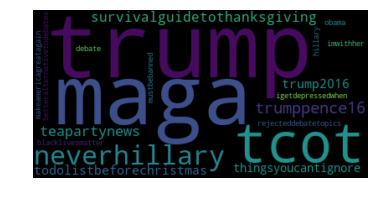

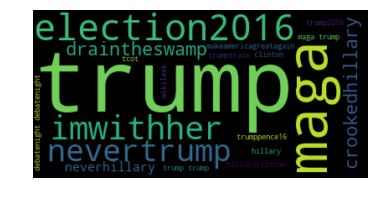

In [85]:
troll_tags = troll['hashtags']
nontroll_tags = nontroll['hashtags']

nlprocess.create_wordcloud(troll_tags,20)
nlprocess.create_wordcloud(nontroll_tags,20)

### Top Words in Each Class

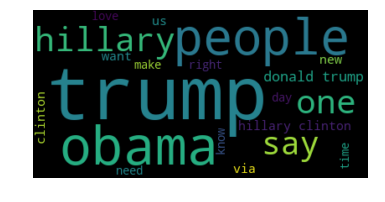

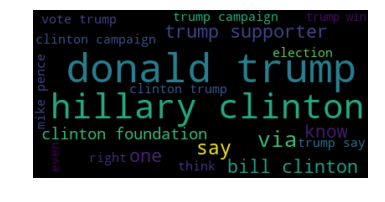

In [86]:
troll_vocab = troll['text']
nontroll_vocab = nontroll['text']

nlprocess.create_wordcloud(troll_vocab,20)
nlprocess.create_wordcloud(nontroll_vocab,20)

In [98]:
troll.isnull().sum()

user_id           0
user_key          0
created_at        0
created_str       0
retweeted         0
text              0
tweet_id          0
hashtags          0
mentions          0
hashtags_count    0
mentions_count    0
date_time         0
lang              0
target            0
dtype: int64

In [142]:
df = pd.concat([troll,nontroll])
df.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,created_str,date_time,hashtags,hashtags_count,lang,mentions,mentions_count,retweeted,target,text
3,2016-12-26 15:06:41,2016-12-26 15:06:41,[ChristmasAftermath],1,en,[],0,1,1,I don't have to guess your religion!
4,2017-08-06 02:36:24,2017-08-06 02:36:24,[],0,en,[],0,1,1,Pence and his lawyers decided which of his of...
17,2017-01-11 10:36:18,2017-01-11 10:36:18,[1],1,en,[],0,1,1,". Scores FIRST Hot 100 Hit With ""Bad And Bou..."
19,2017-02-09 10:26:17,2017-02-09 10:26:17,[],0,en,[],0,1,1,The Marco Rubio knockdown of Elizabeth Warren...
30,2017-02-28 05:43:25,2017-02-28 05:43:25,[],0,en,[],0,1,1,"This week's ""Sweden incident."""


In [136]:
df.tail()

,created_at,created_str,date_time,hashtags,hashtags_count,lang,mentions,mentions_count,retweeted,target,text,tweet_id,user_id,user_key
789418298353922049,NaN,Fri Oct 21 10:49:23 +0000 2016,2016-10-21 10:49:23,[],0,en,[],0,0,0,to influence election judgement.\nWhich one di...,NaN,NaN,NaN
789417149978804224,NaN,Fri Oct 21 10:44:49 +0000 2016,2016-10-21 10:44:49,[],0,en,"[illyrianfields, JoyAnnReid]",2,1,0,"""almost Greek in its tragedy!"" Yes! It was t...",NaN,NaN,NaN
789417547959590912,NaN,Fri Oct 21 10:46:24 +0000 2016,2016-10-21 10:46:24,[],0,en,[LadyGagaNowNet],1,1,0,VIDEO: Lady Gaga on Donald Trump: 'I have not...,NaN,NaN,NaN
789416337953071104,NaN,Fri Oct 21 10:41:36 +0000 2016,2016-10-21 10:41:36,[morningjoe],1,en,[RichDeermeat],1,1,0,Love these non-sequitur posts by Trump follo...,NaN,NaN,NaN
789418096452898817,NaN,Fri Oct 21 10:48:35 +0000 2016,2016-10-21 10:48:35,[],0,en,"[PeacefulChrist, LarryT1940, ReiserWilliam, mi...",7,1,0,\nSTOP HC &amp; spy O before …,NaN,NaN,NaN


## NLP bb

In [ ]:
text = df[['text']]
target = df[['target']]

In [117]:
text.head()

,text
3,I don't have to guess your religion!
4,Pence and his lawyers decided which of his of...
17,". Scores FIRST Hot 100 Hit With ""Bad And Bou..."
19,The Marco Rubio knockdown of Elizabeth Warren...
30,"This week's ""Sweden incident."""


In [143]:
X_train,X_test,y_train,y_test = nlprocess.data_sampler(df.drop(columns=['target'],axis=1),target)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [148]:
X_train

array([['Tue Aug 02 12:08:38 +0000 2016',
        Timestamp('2016-08-02 12:08:38'),
        list(['CrookedHillary', 'TrumpPence16']), ..., 0, 0,
        'Voting for  will increase the number of people carrying these signs. Wake up, VOTE 👉  '],
       ['Thu Sep 22 03:31:28 +0000 2016',
        Timestamp('2016-09-22 03:31:28'), list([]), ..., 2, 1,
        ' Clinton campaign manager draws ire of  hosts '],
       ['Tue Oct 18 19:43:24 +0000 2016',
        Timestamp('2016-10-18 19:43:24'), list([]), ..., 2, 1,
        ' Hillary Clinton Dark Operatives Rigging The Election! Donald Trump was Right  ……'],
       ...,
       ['2016-09-17 21:11:50', Timestamp('2016-09-17 21:11:50'),
        list(['pjnet', 'pjnet', 'pjnet', 'pjnet']), ..., 4, 1,
        ' Republicans sell out Americans again   via \n \n'],
       ['2017-01-11 18:42:37', Timestamp('2017-01-11 18:42:37'),
        list([]), ..., 0, 1,
        ' There will be no meaningful "revolution" led by a rich, White, cisgender, heterosexual 

In [147]:
feat_train=X_train[:,:-1]
feat_test=X_test[:,:-1]
text_train=X_train[:,-1]
text_test=X_test[:,-1]

TypeError: unhashable type: 'slice'

In [127]:
X_train,X_test,y_train,y_test = nlprocess.text_process(text,True)
X_train.head()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/flatironschool/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


TypeError: Singleton array array(True) cannot be considered a valid collection.